In [39]:
import numpy as np
import scipy
import scipy.optimize as opt
import scipy.sparse as sp

import matplotlib.pyplot as plt

In [40]:
N = int(1e3)
s = np.linspace(0, 1, N+1)
h = 1/N

vmax = 50.
g = 9.8
amin, amax = -2.*g, 4.*g
mu = 5.

x0, x1 = 12.5, -12.5
y0, y1 = 0., 0.
v0 = 17.5

In [41]:
D1 = sp.diags([-1, 0, 1], offsets=[0, 1, 2], shape=(N-1, N+1))
D2 = sp.diags([1, -2, 1], offsets=[0, 1, 2], shape=(N-1, N+1))

D1 = sp.vstack([sp.csr_array([-3, 4, -1]+[0]*(N-2)), D1, sp.csr_array([0]*(N-2)+[1, -4, 3])])
D2 = sp.vstack([sp.csr_array([2, -5, 4, -1]+[0]*(N-3)), D2, sp.csr_array([0]*(N-3) + [-1, 4, -5, 2])])

D1 = D1/(2*h)
D2 = D2/(h**2)

I = sp.diags([1, 1], offsets=[0, 1], shape=(N, N+1))
I = .5*h*I

In [42]:
x_init = 12.5*np.cos(np.pi*s)[1:-1]
y_init = 12.5*np.sin(np.pi*s)[1:-1]
v_init = v0*np.ones(N)

In [43]:
xyv_init = np.r_[x_init, y_init, v_init]

In [44]:
x_ = np.r_[x0, x_init, x1]
y_ = np.r_[y0, y_init, y1]
v_ = np.r_[v0, v_init]

D1x = D1@x_
D1y = D1@y_

d = (D1x**2 + D1y**2)**.5
t = np.sum(I@(d/v_))
aT = v_*(D1@v_)/d
aN = v_**2 * np.abs(D2@x_ * D1y - D2@y_*D1x)/d**3

In [45]:
def smooth_max(u, eps=1e-3):
    for i in range(len(u)):
        if u[i]<=0:
            u[i] = 0
        elif u[i]<=eps:
            u[i] = u[i]**2/(2*eps)
        else:
            u[i] = u[i] - eps/2
    return np.sum(u)

In [68]:
def f(xyv):
    x, y, v = xyv[:N-1], xyv[N-1:2*(N-1)], xyv[2*(N-1):]
    x_ = np.r_[x0, x, x1]
    y_ = np.r_[y0, y, y1]
    v_ = np.r_[v0, v]

    D1x = D1@x_
    D1y = D1@y_

    d = (D1x**2 + D1y**2)**.5
    t = np.sum(I@(d/v_))
    aT = v_*(D1@v_)/d
    aN = v_**2 * np.abs(D2@x_ * D1y - D2@y_*D1x)/d**3
    r = (x**2 + y**2)**.5

    
    print(D1@(x_)**2 + D1@(y_)**2)

    res = t
    res += smooth_max(-v)
    res += smooth_max(v - vmax)
    res += smooth_max(-aT + amin)
    res += smooth_max(aT - amax)
    res += smooth_max(aN - mu*g)
    res += smooth_max(r - 15.)
    res += smooth_max(12.5 -r)
    return res

In [69]:
f(xyv_init)

[0. 0. 0. ... 0. 0. 0.]


2.243991072416188

In [48]:
res = opt.minimize(f, xyv_init, method='trust-constr')

KeyboardInterrupt: 

In [33]:
res

 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 2.243991072416188
       x: [ 1.250e+01  1.250e+01 ...  1.750e+01  1.750e+01]
    nfev: 1000
   maxcv: 0.0

In [34]:
x, y, v = res.x[:N-1], res.x[N-1:2*(N-1)], res.x[2*(N-1):]

x = np.r_[x0, x, x1]
y = np.r_[y0, y, y1]
v = np.r_[v0, v]

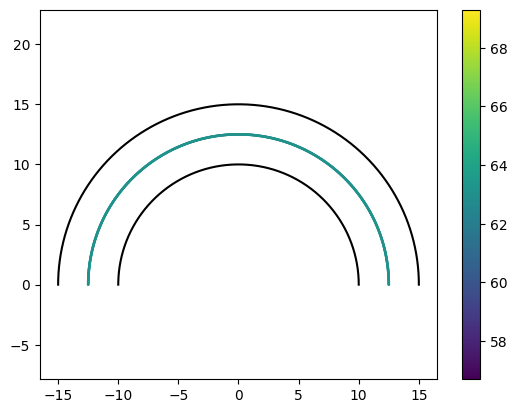

In [35]:
plt.axis('equal')
plt.plot(10*np.cos(np.pi*s), 10*np.sin(np.pi*s), 'black')
plt.scatter(x, y, c=v*3.6, s=.8)
plt.plot(15*np.cos(np.pi*s), 15*np.sin(np.pi*s), 'black')
plt.colorbar()

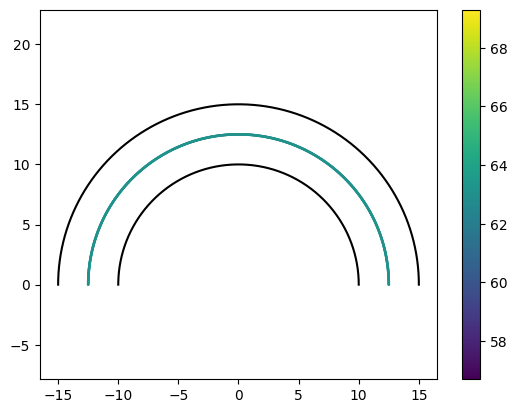

In [36]:
s_interp = np.linspace(0, 1, 1001)
x_interp = np.interp(s_interp, s, x)
y_interp = np.interp(s_interp, s, y)
v_interp = np.interp(s_interp, s, v)

plt.axis('equal')
plt.plot(10*np.cos(np.pi*s), 10*np.sin(np.pi*s), 'black')
plt.scatter(x_interp, y_interp, c=v_interp*3.6, s=.8)
plt.plot(15*np.cos(np.pi*s), 15*np.sin(np.pi*s), 'black')
plt.colorbar()